In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score
,
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()
(data['SkinThickness'] == 0 ).sum()

227

###
Too many invalid zero -> imputing instead of drop

In [4]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN, inplace= True)

In [5]:
print(data.isnull().sum())
data.head()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


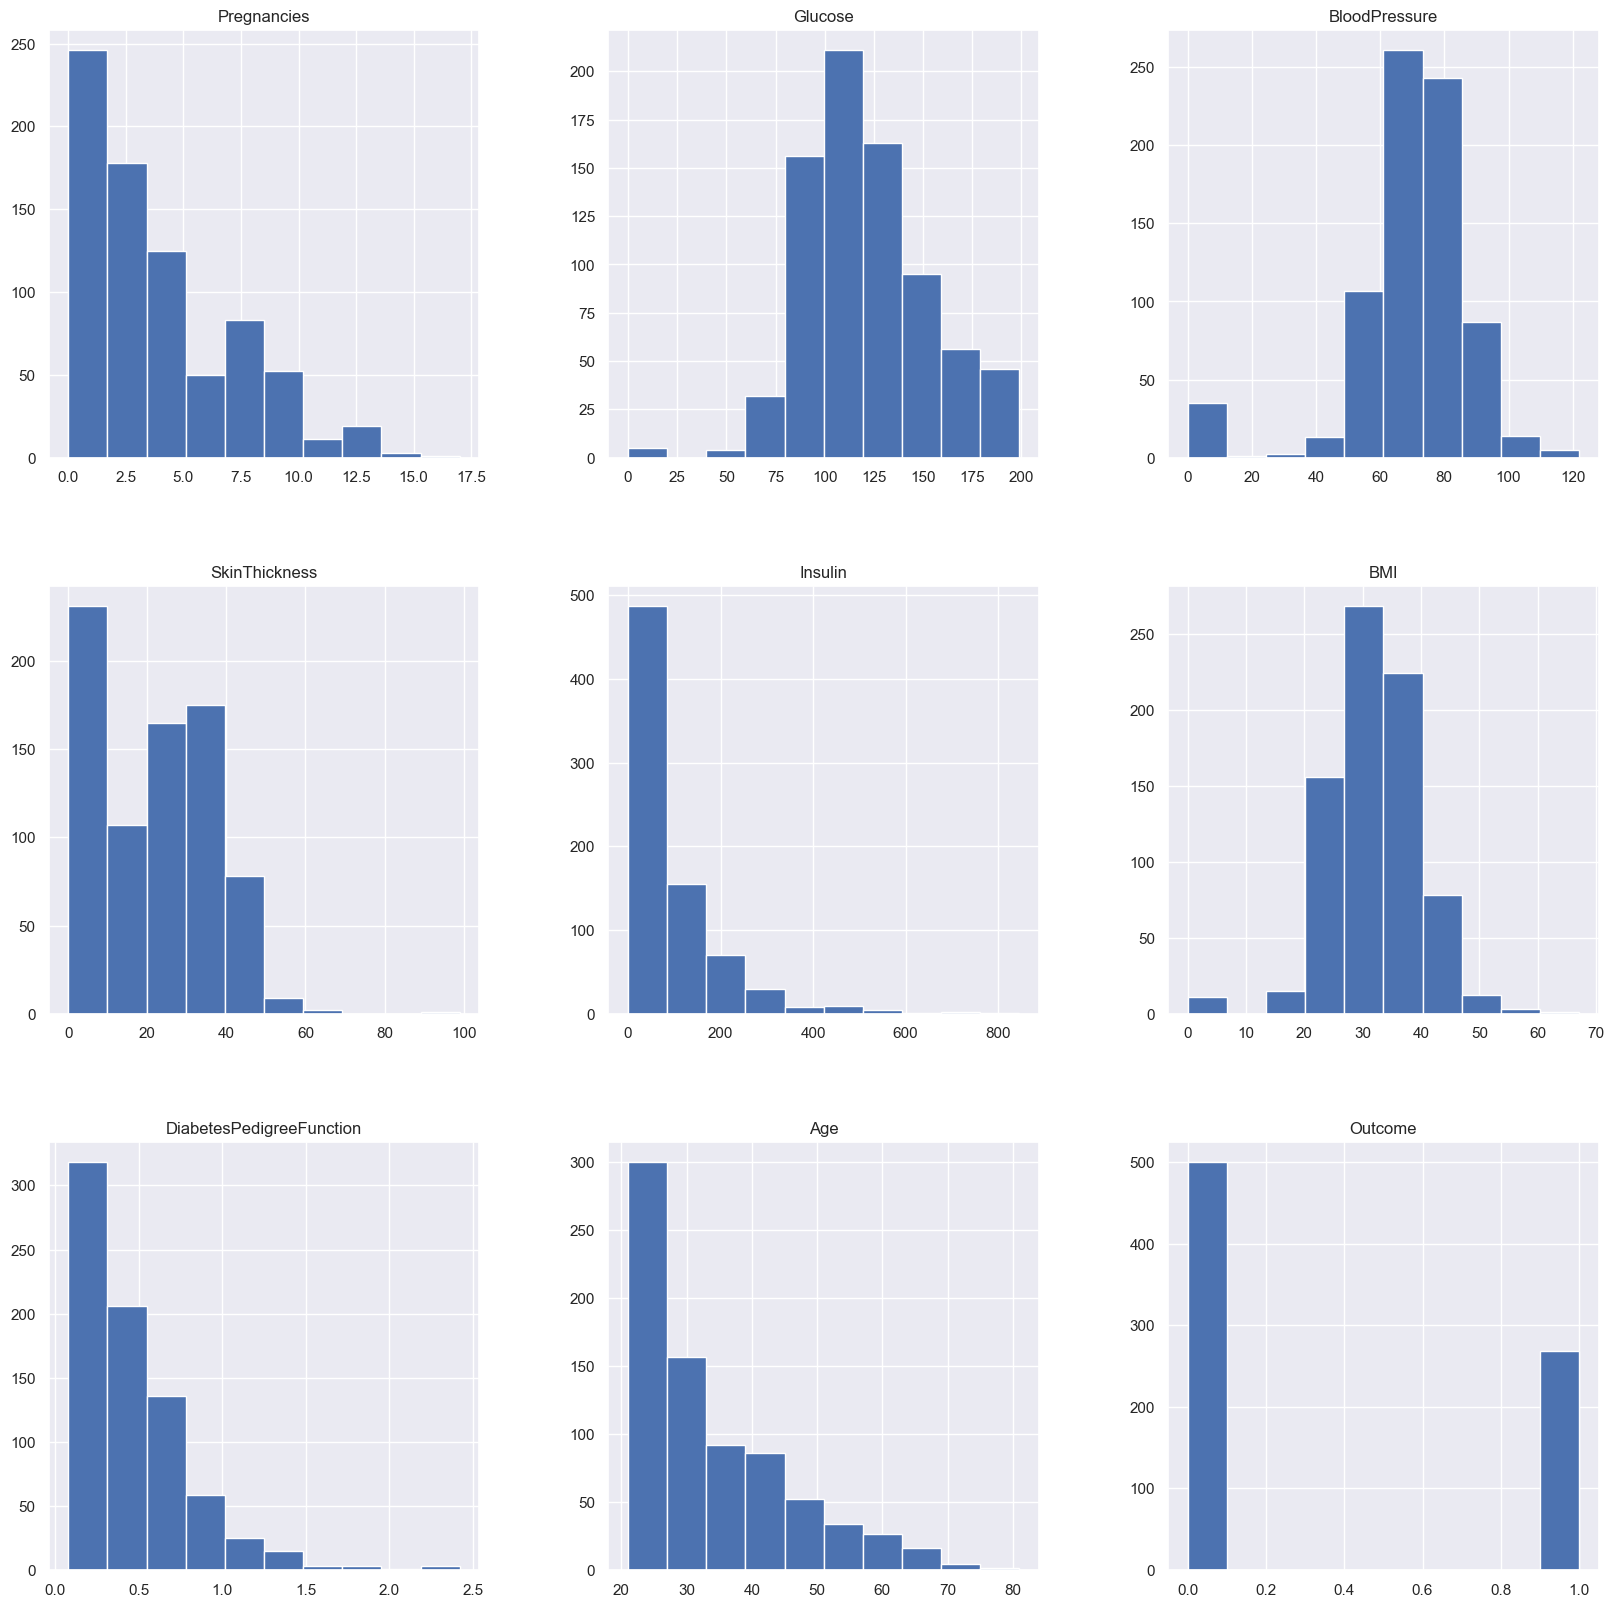

In [6]:
p = data.hist(figsize = (20,20))


In [7]:
for col in data:
    data[col].fillna(data[col].median(), inplace = True)

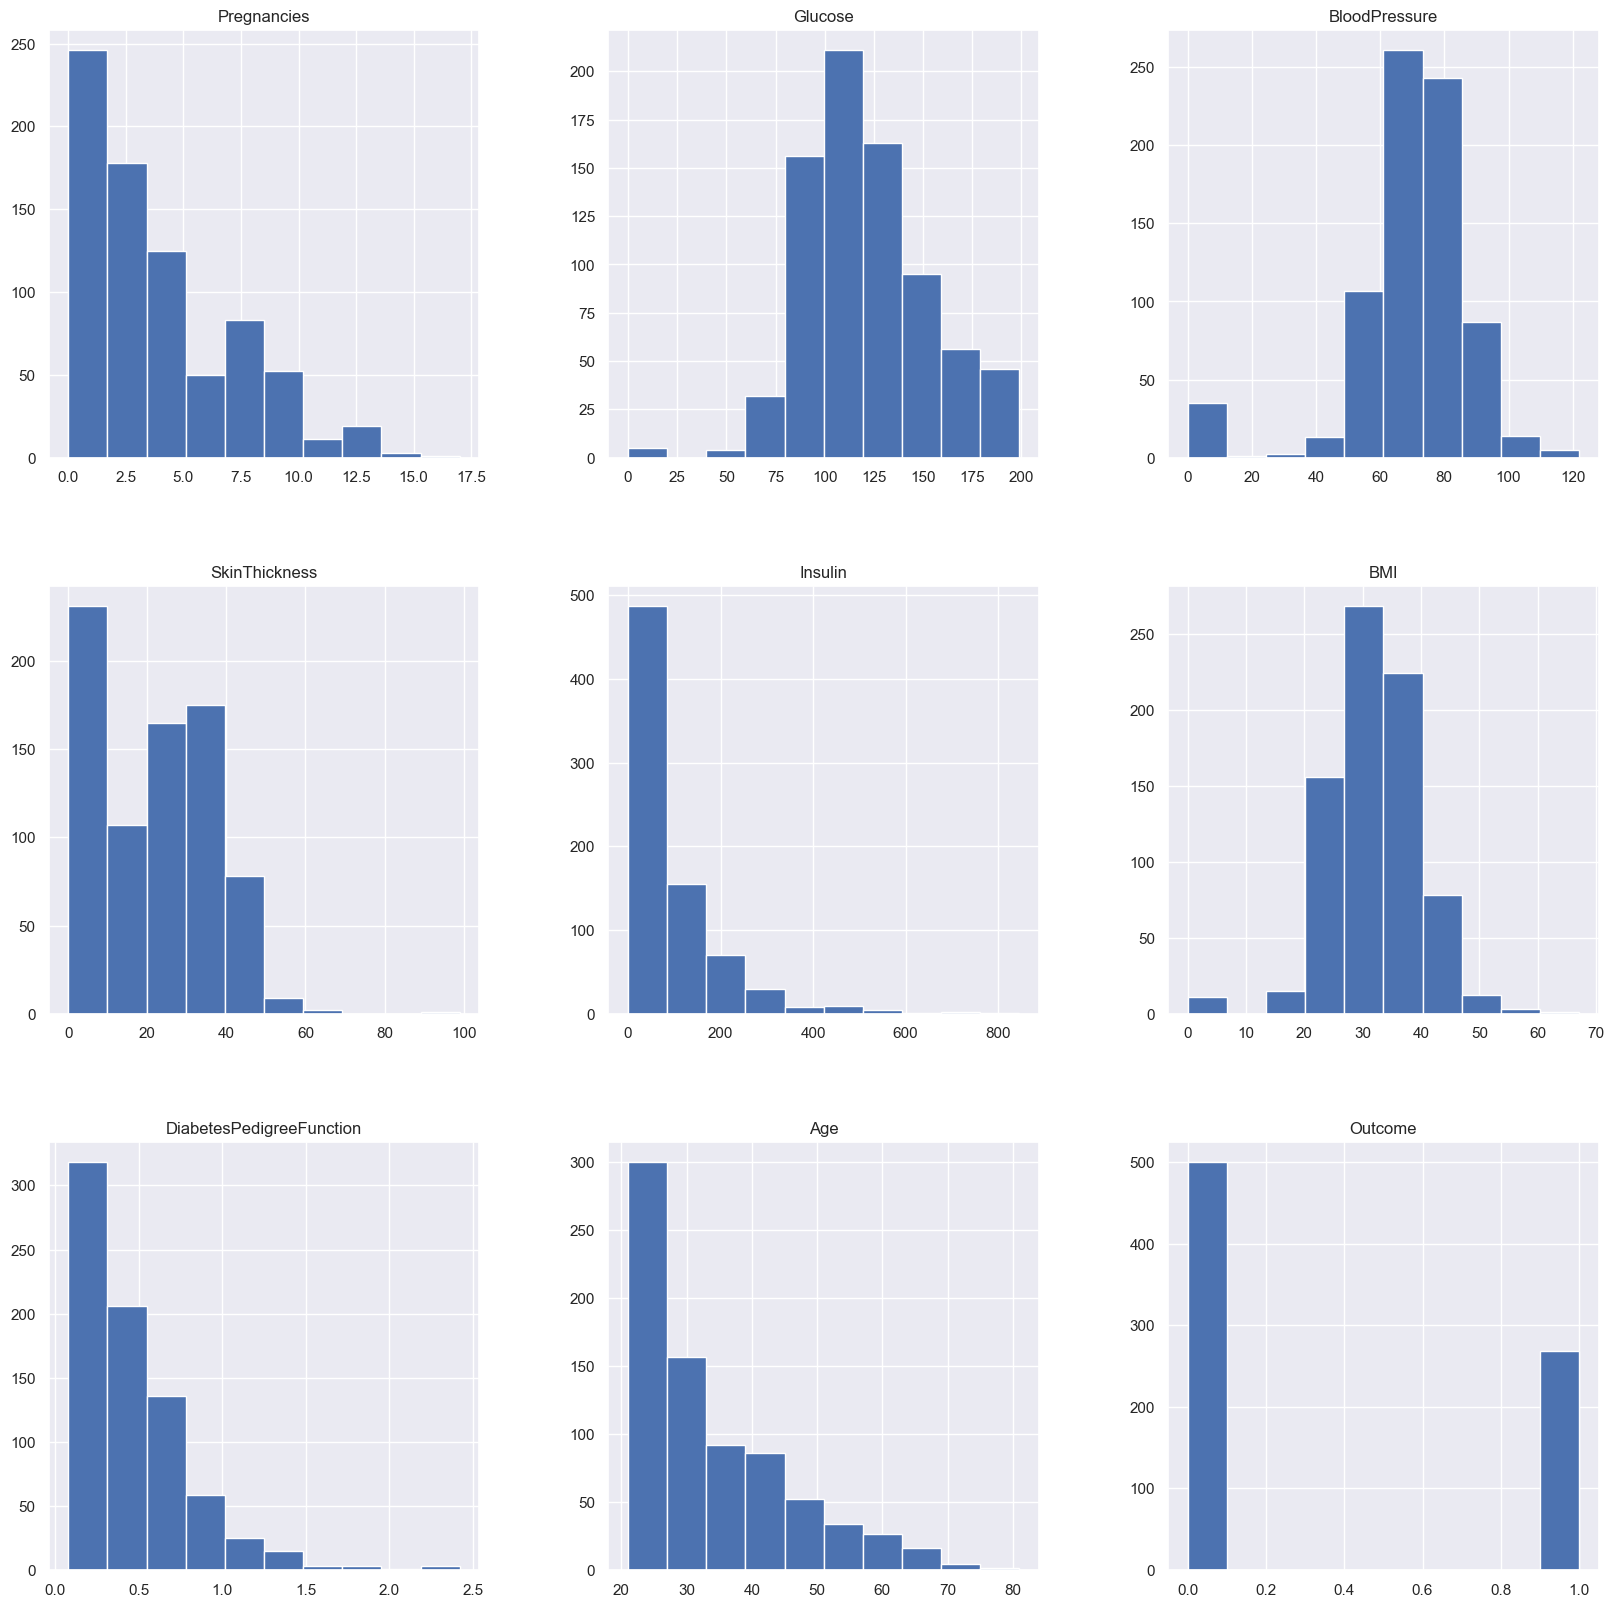

In [8]:
p = data.hist(figsize = (20,20))

In [9]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
y = data.copy()["Outcome"]
X = data.copy().drop("Outcome", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def evaluate_model(Y_pred, Y_test):
  # print(confusion_matrix(Y_test, Y_pred))
  acc = accuracy_score(Y_test, Y_pred)
  pre = precision_score(Y_test, Y_pred)
  rec = recall_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred, pos_label=1)
  roc_auc = roc_auc_score(Y_test, Y_pred)
  return acc, pre, rec, f1, roc_auc

In [12]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

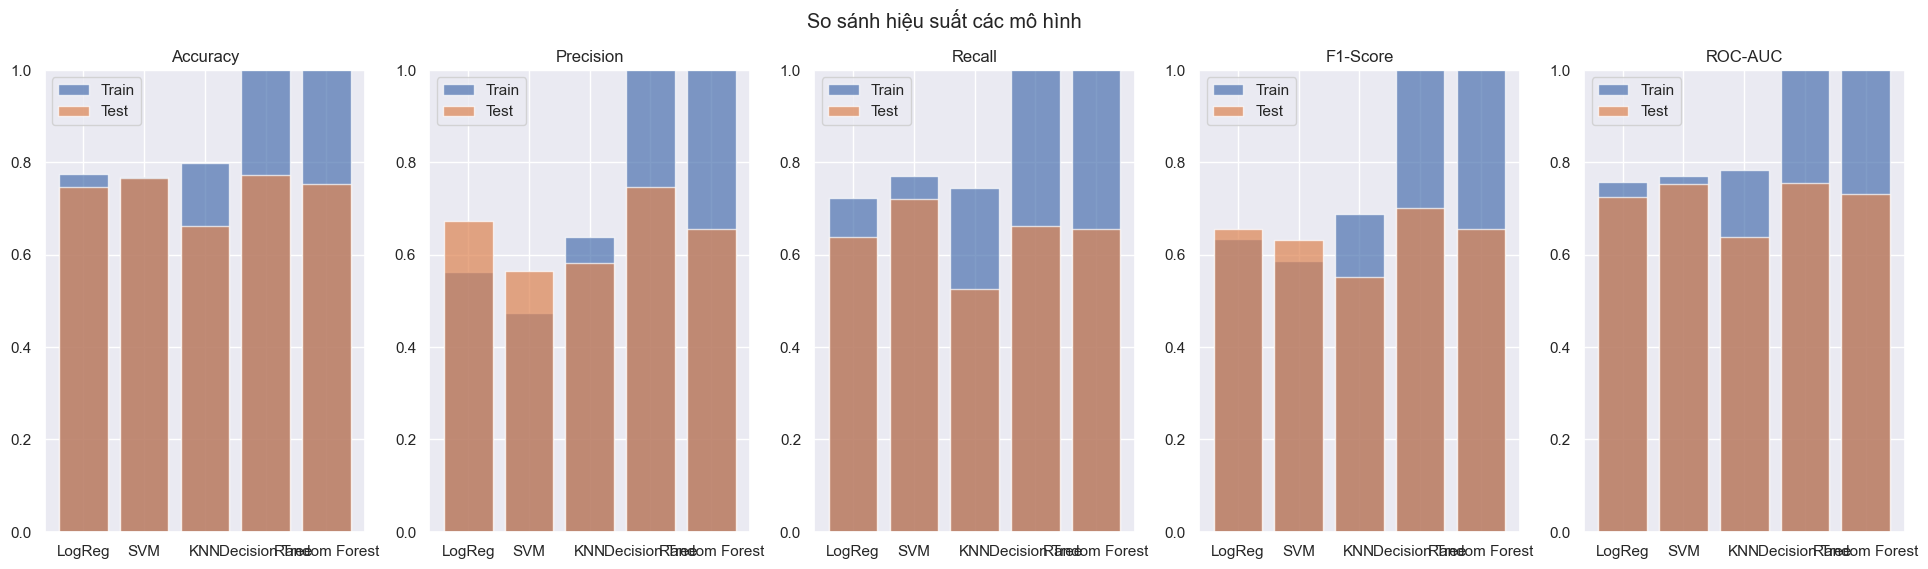

In [13]:
def evaluating(models):
    train_results = []
    test_results = []
    model_names = ["LogReg", "SVM", "KNN", "Decision Tree", "Random Forest"]
    metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

    for model in models:
        model.fit(X_train, y_train)
        train_results.append(evaluate_model(y_train, model.predict(X_train)))
        test_results.append(evaluate_model(y_test, model.predict(X_test)))

    train_results = np.array(train_results) 
    test_results = np.array(test_results)

    fig, axes = plt.subplots(1, 5, figsize=(24, 6))

    for i, metric in enumerate(metrics):
        axes[i].bar(model_names, train_results[:, i], label="Train", alpha=0.7)
        axes[i].bar(model_names, test_results[:, i], label="Test", alpha=0.7)
        axes[i].set_title(metric)
        axes[i].set_ylim(0, 1)
        axes[i].legend()

    plt.suptitle("So sánh hiệu suất các mô hình")
    plt.show()
evaluating(models)

### 
Các mô hình cây có vẻ overfit, điểm recall các mô hình nhìn chung không cao, cần scaling và reguralization.

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(KNeighborsClassifier(),param_grid)
knn_cv.fit(X,y)

knn_cv.best_params_

{'n_neighbors': 14}

In [18]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5], 
    'max_features': ['sqrt', 'log2'], 
    'class_weight': ['balanced', 'balanced_subsample'] 
}

CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

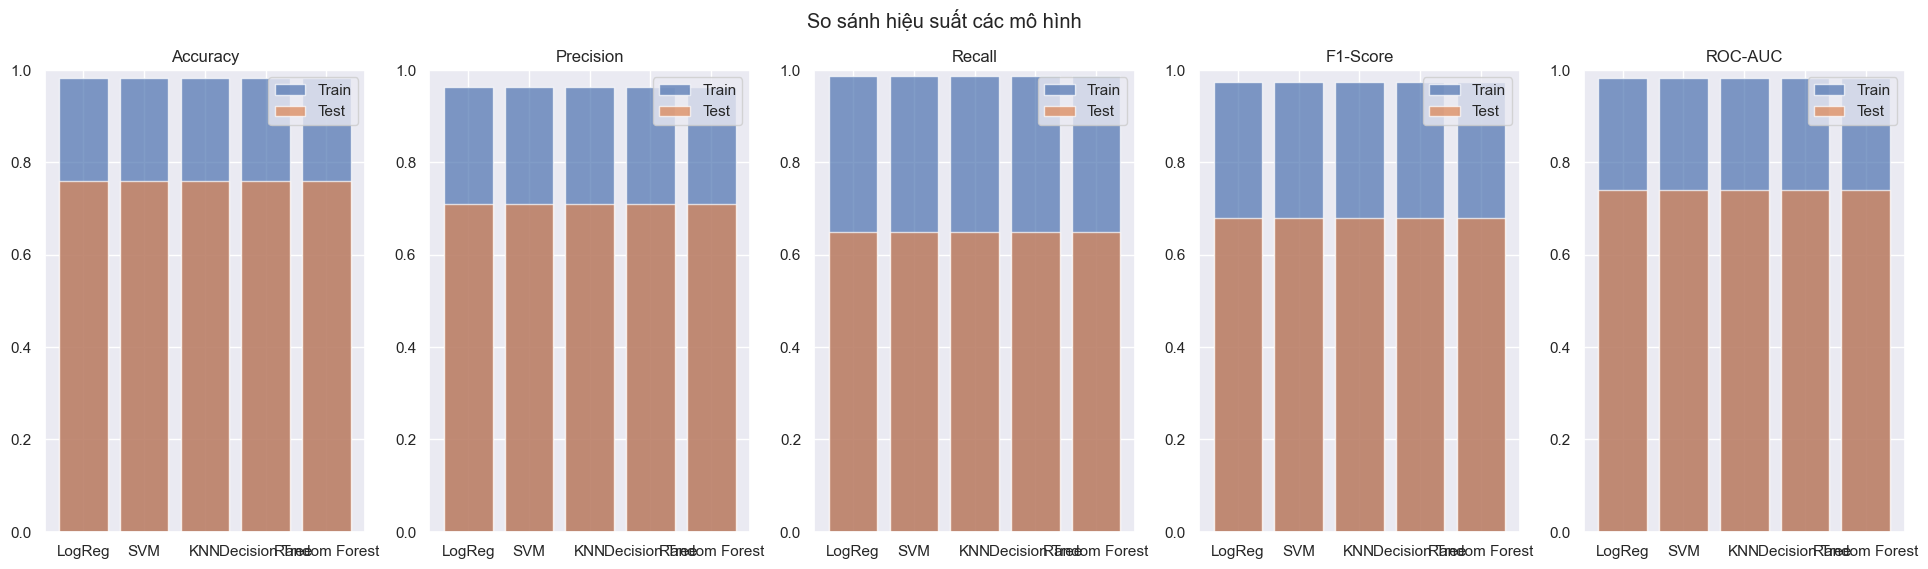

In [ ]:
models = [RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')]
evaluating(models)